# 2. 코로나 바이러스

## 2-1. 문제 정의 및 가설수립
* 국가별 코로나 바이러스 발생현황 분석

## 2-2. 데이터 가져오기

In [2]:
#!kaggle datasets download -d imdevskp/corona-virus-report

In [3]:
#!mkdir corona_data

In [4]:
#!tar -xvf archieve.zip -C corona_data

## 2-3. 데이터 로드하기

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('corona_data/covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## 2-4. 데이터 살펴보기

In [7]:
df.shape

(49068, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [9]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [10]:
df['Country/Region'].value_counts()

China             6204
Canada            2256
France            2068
United Kingdom    2068
Australia         1504
                  ... 
Kosovo             188
Czechia            188
Angola             188
Iceland            188
Oman               188
Name: Country/Region, Length: 187, dtype: int64

In [11]:
df['Date'].value_counts()

2020-07-07    261
2020-05-27    261
2020-02-19    261
2020-02-06    261
2020-04-15    261
             ... 
2020-04-29    261
2020-06-04    261
2020-06-21    261
2020-01-24    261
2020-02-20    261
Name: Date, Length: 188, dtype: int64

In [12]:
df['Date'].min(), df['Date'].max()

('2020-01-22', '2020-07-27')

In [13]:
# Date 타입 수정
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## 2-5. EDA(탐색적 데이터분석)
* 우리나라 코로나 데이터 분석
* 국가별 누적 확진자, 사망자, 회복자 데이터 분석

### 1. 대한민국 코로나 데이터 분석

In [14]:
df[df['Country/Region'].str.contains('Korea')]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
141,NaN,South Korea,35.907757,127.766922,2020-01-22,1,0,0,1,Western Pacific
402,NaN,South Korea,35.907757,127.766922,2020-01-23,1,0,0,1,Western Pacific
663,NaN,South Korea,35.907757,127.766922,2020-01-24,2,0,0,2,Western Pacific
924,NaN,South Korea,35.907757,127.766922,2020-01-25,2,0,0,2,Western Pacific
1185,NaN,South Korea,35.907757,127.766922,2020-01-26,3,0,0,3,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47904,NaN,South Korea,35.907757,127.766922,2020-07-23,13979,298,12817,864,Western Pacific
48165,NaN,South Korea,35.907757,127.766922,2020-07-24,14092,298,12866,928,Western Pacific
48426,NaN,South Korea,35.907757,127.766922,2020-07-25,14150,298,12890,962,Western Pacific
48687,NaN,South Korea,35.907757,127.766922,2020-07-26,14175,299,12905,971,Western Pacific


In [15]:
koreaDF = df[df['Country/Region'] == 'South Korea']
koreaDF.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
47904,NaN,South Korea,35.907757,127.766922,2020-07-23,13979,298,12817,864,Western Pacific
48165,NaN,South Korea,35.907757,127.766922,2020-07-24,14092,298,12866,928,Western Pacific
48426,NaN,South Korea,35.907757,127.766922,2020-07-25,14150,298,12890,962,Western Pacific
48687,NaN,South Korea,35.907757,127.766922,2020-07-26,14175,299,12905,971,Western Pacific
48948,NaN,South Korea,35.907757,127.766922,2020-07-27,14203,300,13007,896,Western Pacific


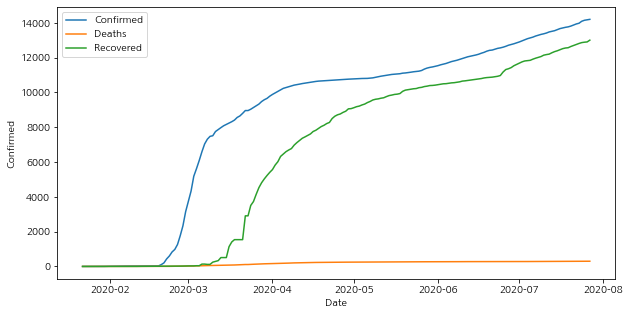

In [35]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Confirmed', data=koreaDF)
sns.lineplot(x='Date', y='Deaths', data=koreaDF)
sns.lineplot(x='Date', y='Recovered', data=koreaDF)
plt.legend(['Confirmed', 'Deaths', 'Recovered'])
plt.show()

### 2. 국가별 코로나 데이터 분석

In [17]:
max(df.Date)

Timestamp('2020-07-27 00:00:00')

In [18]:
latest_DF = df[df['Date'] == max(df.Date)]
latest_DF.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


In [19]:
country_sorted_DF = latest_DF.sort_values(by='Confirmed', ascending=False)
country_sorted_DF.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49030,NaN,US,40.000000,-100.000000,2020-07-27,4290259,148011,1325804,2816444,Americas
48835,NaN,Brazil,-14.235000,-51.925300,2020-07-27,2442375,87618,1846641,508116,Americas
48936,NaN,India,20.593684,78.962880,2020-07-27,1480073,33408,951166,495499,South-East Asia
48992,NaN,Russia,61.524010,105.318756,2020-07-27,816680,13334,602249,201097,Europe
49005,NaN,South Africa,-30.559500,22.937500,2020-07-27,452529,7067,274925,170537,Africa


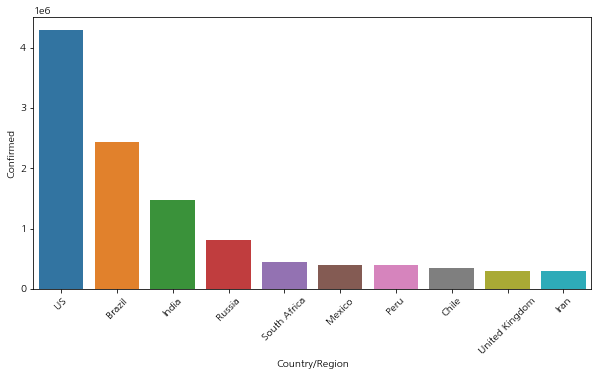

In [20]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
sns.barplot(x='Country/Region', y='Confirmed', data=country_sorted_DF.head(10))
plt.show()

In [21]:
country_sorted_DF2 = latest_DF.sort_values(by='Deaths', ascending=False)
country_sorted_DF2.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49030,NaN,US,40.00000,-100.00000,2020-07-27,4290259,148011,1325804,2816444,Americas
48835,NaN,Brazil,-14.23500,-51.92530,2020-07-27,2442375,87618,1846641,508116,Americas
49028,NaN,United Kingdom,55.37810,-3.43600,2020-07-27,300111,45759,0,254352,Europe
48963,NaN,Mexico,23.63450,-102.55280,2020-07-27,395489,44022,303810,47657,Americas
48942,NaN,Italy,41.87194,12.56738,2020-07-27,246286,35112,198593,12581,Europe


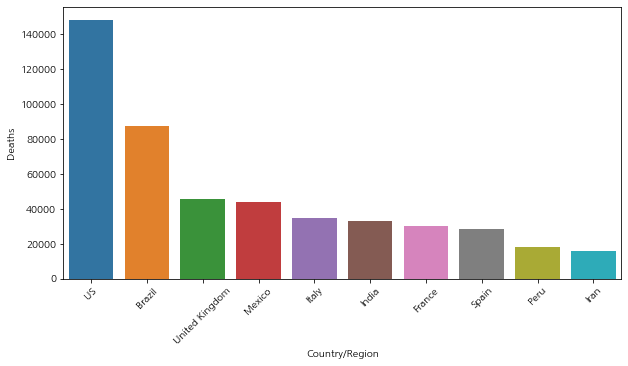

In [22]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
sns.barplot(x='Country/Region', y='Deaths', data=country_sorted_DF2.head(10))
plt.show()

In [23]:
# 전세계 일자별 발생 현황
date_status = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()
date_status

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52
...,...,...,...
2020-07-23,15510481,633506,8710969
2020-07-24,15791645,639650,8939705
2020-07-25,16047190,644517,9158743


In [24]:
date_status2 = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
date_status2

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555,17,28
1,2020-01-23,654,18,30
2,2020-01-24,941,26,36
3,2020-01-25,1434,42,39
4,2020-01-26,2118,56,52
...,...,...,...,...
183,2020-07-23,15510481,633506,8710969
184,2020-07-24,15791645,639650,8939705
185,2020-07-25,16047190,644517,9158743
186,2020-07-26,16251796,648621,9293464


<AxesSubplot:xlabel='Date'>

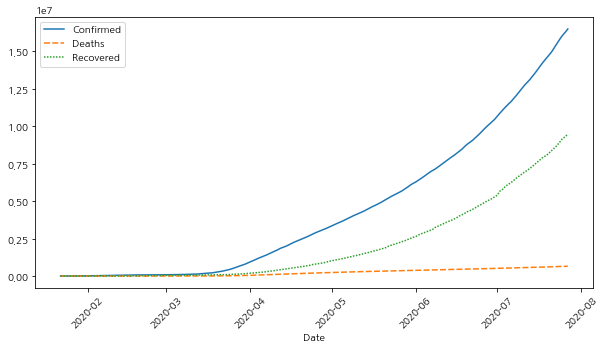

In [25]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.lineplot(data=date_status)

### 3. folium 사용해보기
* folium : 파이썬 지도 라이브러리
* https://python-visualization.github.io/folium/

In [26]:
import folium
m = folium.Map()
m

In [27]:
# 구글지도 -> 서울시청 위도, 경도
m = folium.Map(location=[37.34207220424684, 126.83152862714726], zoom_start=20)
m

In [28]:
# CircleMarker 그리기
m = folium.Map(location=[37.34208073397436, 126.83151789831146], zoom_start=20)
folium.CircleMarker([37.34208073397436, 126.83151789831146], radius=100).add_to(m)
m

In [29]:
# CircleMarker 색상, 채우기, 채우기 색상 설정
m = folium.Map(location=[37.34208073397436, 126.83151789831146], zoom_start=20)
folium.CircleMarker([37.34208073397436, 126.83151789831146], radius=100, color="yellow", fill="False", fill_color="blue").add_to(m)
m

In [30]:
# CircleMarker로 popup 표시
m = folium.Map(location=[37.34208073397436, 126.83151789831146], zoom_start=20)
folium.CircleMarker([37.34208073397436, 126.83151789831146], radius=100, color="blue", fill="True", fill_color="blue", popup="디미고").add_to(m)
m

In [31]:
latest_DF

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [32]:
latest_DF.loc[48807, 'Lat'], latest_DF.loc[48807, 'Long'], latest_DF.loc[48807, 'Confirmed']  # 또는 latest_DF['Lat'][48807]

(33.93911, 67.709953, 36263)

In [33]:
# 지도에 전세계 국가별 확진자 수 CircleMarker로 표시
m = folium.Map(location=[0, 0], zoom_start=3)  # 널 아일랜드
for n in latest_DF.index:
    folium.CircleMarker([latest_DF.loc[n, 'Lat'], latest_DF.loc[n, 'Long']], radius = latest_DF.loc[n, 'Confirmed']/30000
    , color='red', fill="True", fill_color='red', popup=latest_DF.loc[n, 'Country/Region'] + ":" + str(latest_DF.loc[n, 'Confirmed'])).add_to(m)
m

In [34]:
folium.CircleMarker?

Init signature:
folium.CircleMarker(
    location=None,
    radius=10,
    popup=None,
    tooltip=None,
    **kwargs,
)
Docstring:     
A circle of a fixed size with radius specified in pixels.

See :func:`folium.vector_layers.path_options` for the `Path` options.

Parameters
----------
location: tuple[float, float]
    Latitude and Longitude pair (Northing, Easting)
popup: string or folium.Popup, default None
    Input text or visualization for object displayed when clicking.
tooltip: str or folium.Tooltip, default None
    Display a text when hovering over the object.
radius: float, default 10
    Radius of the circle marker, in pixels.
**kwargs
    Other valid (possibly inherited) options. See:
    https://leafletjs.com/reference-1.6.0.html#circlemarker
File:           c:\users\myha\anaconda3\lib\site-packages\folium\vector_layers.py
Type:           type
Subclasses:     
